# Data


In [1]:
import os
corpus_file = '/home/ec2-user/SageMaker/serperi/system/sessions/scal/One/data/exported_data_2022-10-12_14-08.csv'
assert os.path.isfile(corpus_file)

files = open(corpus_file, 'r').read().splitlines()[1:]
files[:2]


['https://proquest.com/docview/1151636504,rel,1.000',
 'https://proquest.com/docview/1151316407,rel,1.000']

In [5]:
import re
import pandas as pd
ids = list(map(lambda file: re.findall('docview/([0-9]{10})', file)[0], files))


scores = list(map(lambda file: float(file.split(',')[-1]), files))

from utils.tdmstudio import get_filename, get_title_and_text, get_date, get_title
texts = list(map(lambda id_: get_title_and_text(get_filename(id_)) , ids))
titles = list(map(lambda id_: get_title(get_filename(id_)) , ids))

dates = list(map(lambda id_: get_date(get_filename(id_)) , ids))

df = pd.DataFrame({'id':ids, 'full text':texts, 'date':dates, 'score':scores, 'title':titles})
df.sort_values(by=['date'])

,id,full text,date,score,title
232,1288372864,A Living Language.\n \n \n...,1960-01-11,0.048,A Living Language.
564,1288387499,"Immigrant Total In '45-'59 Spaa Nears 2,000,00...",1960-01-27,0.046,"Immigrant Total In '45-'59 Spaa Nears 2,000,000."
1851,1288390691,How to Make More Jobs.\n \n ...,1960-01-27,0.044,How to Make More Jobs.
2134,1288441203,Quebec Bores Plan to Let Universities Get Otto...,1960-01-27,0.050,Quebec Bores Plan to Let Universities Get Otto...
1933,1288387954,"Italians Top '59 Immigrant List With 26,822; B...",1960-02-03,0.049,"Italians Top '59 Immigrant List With 26,822; B..."
...,...,...,...,...,...
14124,2606109038,Alberta's fury is aimed at Quebec (again).Albe...,2018-12-12,0.044,Alberta's fury is aimed at Quebec (again).
15590,2610098079,Canada has an immigrant wage-gap problem.Canad...,2018-12-13,0.044,Canada has an immigrant wage-gap problem.
15022,2606119751,The multiculturalism conundrum.The multicultur...,2018-12-15,0.054,The multiculturalism conundrum.
12047,2606119581,In Iqaluit a push for preserving a culture's c...,2018-12-15,0.053,In Iqaluit a push for preserving a culture's c...


# No of articles per date


<BarContainer object of 9980 artists>

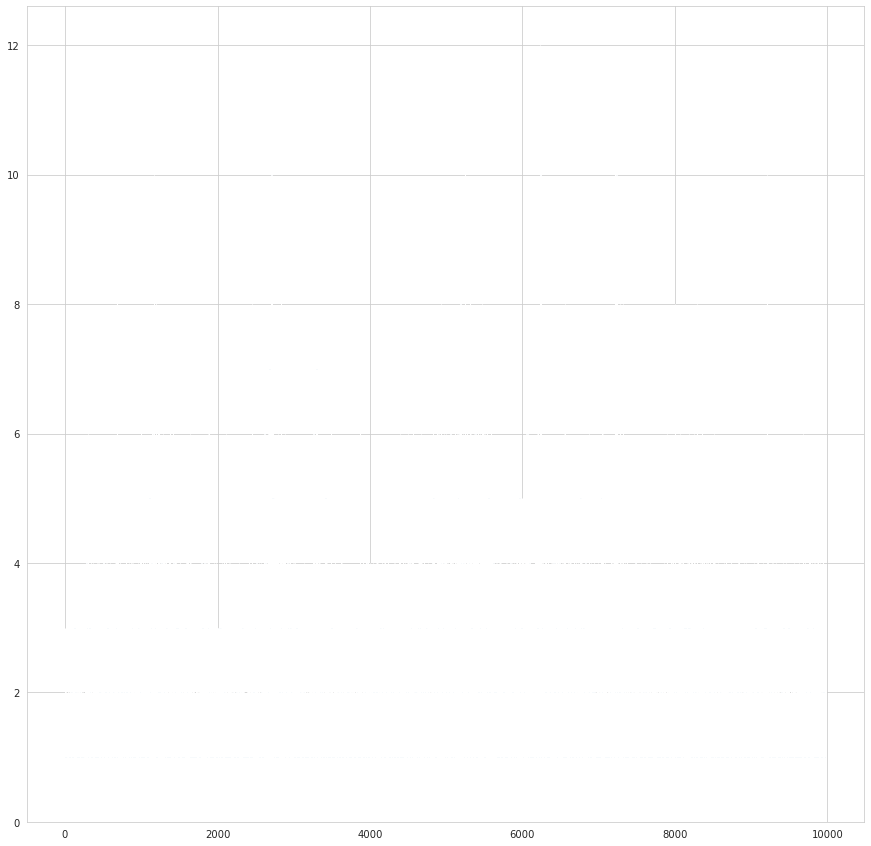

In [36]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1)
dates = np.array(sorted(set(df['date'])))
y = np.zeros(shape=(len(dates),))
for idx,date in enumerate(dates):
    y[idx]+=len(df[df['date']==date])
ax.bar(np.array(range(len(dates))),y)

# VARIABLE WORDS

In [25]:
vocab1 = np.array((tfvectorizer.get_feature_names_out()))
dates = np.array(sorted(set(df['date'])))
date2index = dict([(date,idx) for idx,date in enumerate(dates)])
matrix = np.zeros(shape=(len(dates), len(vocab1)))
                  
for row in range(tf_X.shape[0]):
    vec = tf_X[row,:]
    date = df['date'].iloc[row]
    matrix[date2index[date], :] +=vec
    


In [9]:
vocab1[np.argsort(np.std(matrix,axis=0))][::-1][:100]

array(['Quebec', 'Canada', 'school', 'French', 'french', 'language',
       'speak', 'English', 'immigrant', 'year', 'people', 'province',
       'Trudeau', 'canadian', 'film', 'federal', 'government', 'right',
       'culture', 'Canadians', 'make', 'country', 'cent', 'Ontario',
       'Toronto', 'city', 'Montreal', 'Government', 'work', 'student',
       'Ottawa', 'cultural', 'child', 'public', 'history', 'group',
       'community', 'time', 'come', 'France', 'society', 'Minister',
       'like', 'want', 'woman', 'tion', 'City', 'nation', 'think',
       'policy', 'power', 'program', 'political', 'Bourassa', 'world',
       'board', 'building', 'education', 'change', 'know', 'report',
       'need', 'minority', 'family', 'Quebec City', 'economic',
       'constitutional', 'Premier', 'good', 'ethnic', 'Meech', 'just',
       'million', 'english', 'business', 'Jean', 'life', 'tell', 'issue',
       'accord', 'minister', 'provincial', 'party', 'immigration',
       'parent', 'vote', 'nat

In [26]:
matrix.shape

(9980, 10000)

In [14]:
from statsmodels.tsa.stattools import adfuller

for var in range(matrix.shape[1]):
    result = adfuller(matrix[:,var])
    pvalue = result[1]
#     print('ADF Statistic: %f' % result[0])
#     print('p-value: %f' % result[1])
#     print('Critical Values:')
#     break

# Histogram

In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from sklearn.feature_extraction import text
import numpy as np 

nlp=spacy.load('en_core_web_sm', disable=['textcat', 'ner', 'parser',])

def preprocessor(text):
    return ' '.join([token.lemma_ for token in nlp(text) if token.lemma_.isalpha() and len(token.lemma_)>3])

if not os.path.isfile('data/MC_analysis/tfvectorizer.pickle'):   
    print('Creating vectorizer ...')
    tfvectorizer = TfidfVectorizer(preprocessor=preprocessor,
                                 ngram_range=(1,3),
                                 max_features=10000,
                                 use_idf=False,
                                 stop_words=text.ENGLISH_STOP_WORDS.difference({'made'}),
                                )
    tf_X = tfvectorizer.fit_transform(df['full text'])
    pickle.dump(tfvectorizer, open('data/MC_analysis/tfvectorizer.pickle', 'wb'))
else:
    print('Loading tf vectorizer from disk')
    tfvectorizer = pickle.load(open('data/MC_analysis/tfvectorizer.pickle', 'rb'))
    tf_X = tfvectorizer.transform(df['full text'])
    
print(np.sum(tf_X.shape))

Loading tf vectorizer from disk
27026


In [21]:
import numpy as np
frequency_of_words = np.sum(tf_X.toarray(), axis=0)

tfvectorizer.get_feature_names_out()[np.argsort(frequency_of_words)[::-1]][:100]

array(['Quebec', 'Canada', 'year', 'school', 'make', 'French', 'french',
       'people', 'speak', 'language', 'canadian', 'English', 'province',
       'country', 'government', 'time', 'federal', 'come', 'tion',
       'right', 'work', 'Canadians', 'like', 'want', 'Montreal',
       'culture', 'immigrant', 'Ottawa', 'cent', 'group', 'Toronto',
       'public', 'Minister', 'know', 'Ontario', 'cultural', 'think',
       'good', 'ment', 'just', 'community', 'Government', 'need',
       'political', 'change', 'child', 'long', 'tell', 'society', 'city',
       'world', 'student', 'policy', 'issue', 'live', 'thing', 'life',
       'great', 'provincial', 'program', 'national', 'power', 'feel',
       'history', 'place', 'film', 'question', 'Trudeau', 'leave', 'high',
       'economic', 'problem', 'mean', 'Canadian', 'look', 'week',
       'support', 'City', 'education', 'include', 'nation', 'english',
       'minister', 'point', 'yesterday', 'family', 'state', 'member',
       'Premier', 'he

In [37]:
[word for word in tfvectorizer.get_feature_names_out() if ' ' in word]

['ADELE FREEDMAN',
 'ANDRE PICARD',
 'Affairs Minister',
 'Alberta British',
 'Allaire report',
 'Alliance Quebec',
 'Amer ican',
 'Anglo Saxon',
 'Arts Centre',
 'Arts Correspondent',
 'Arts Council',
 'Assembly First',
 'Assembly First Nations',
 'Associa tion',
 'Atlantic Canada',
 'Atlantic province',
 'Avenir Quebec',
 'Bank Canada',
 'Baptiste Society',
 'Belanger Campeau',
 'Bernard Landry',
 'Bilingualism Biculturalism',
 'Bill Quebec',
 'Bill Rights',
 'Bloc Quebecois',
 'Bloc Quebecois Leader',
 'Board Canada',
 'Board Education',
 'Board Trade',
 'Bourassa Quebec',
 'Brian Mulroney',
 'British Colum',
 'British Columbia',
 'British North',
 'British North America',
 'British lumbia',
 'Broadcasting Corp',
 'Bruns wick',
 'Bureau Globe',
 'Bureau Globe Mail',
 'Bureau MONTREAL',
 'Bureau OTTAWA',
 'Bureau QUEBEC',
 'Bureau Quebec',
 'Cabinet minister',
 'Camille Laurin',
 'Campeau commission',
 'Cana dian',
 'Cana dians',
 'Canada Canada',
 'Canada Canadians',
 'Canada Counci

<BarContainer object of 100 artists>

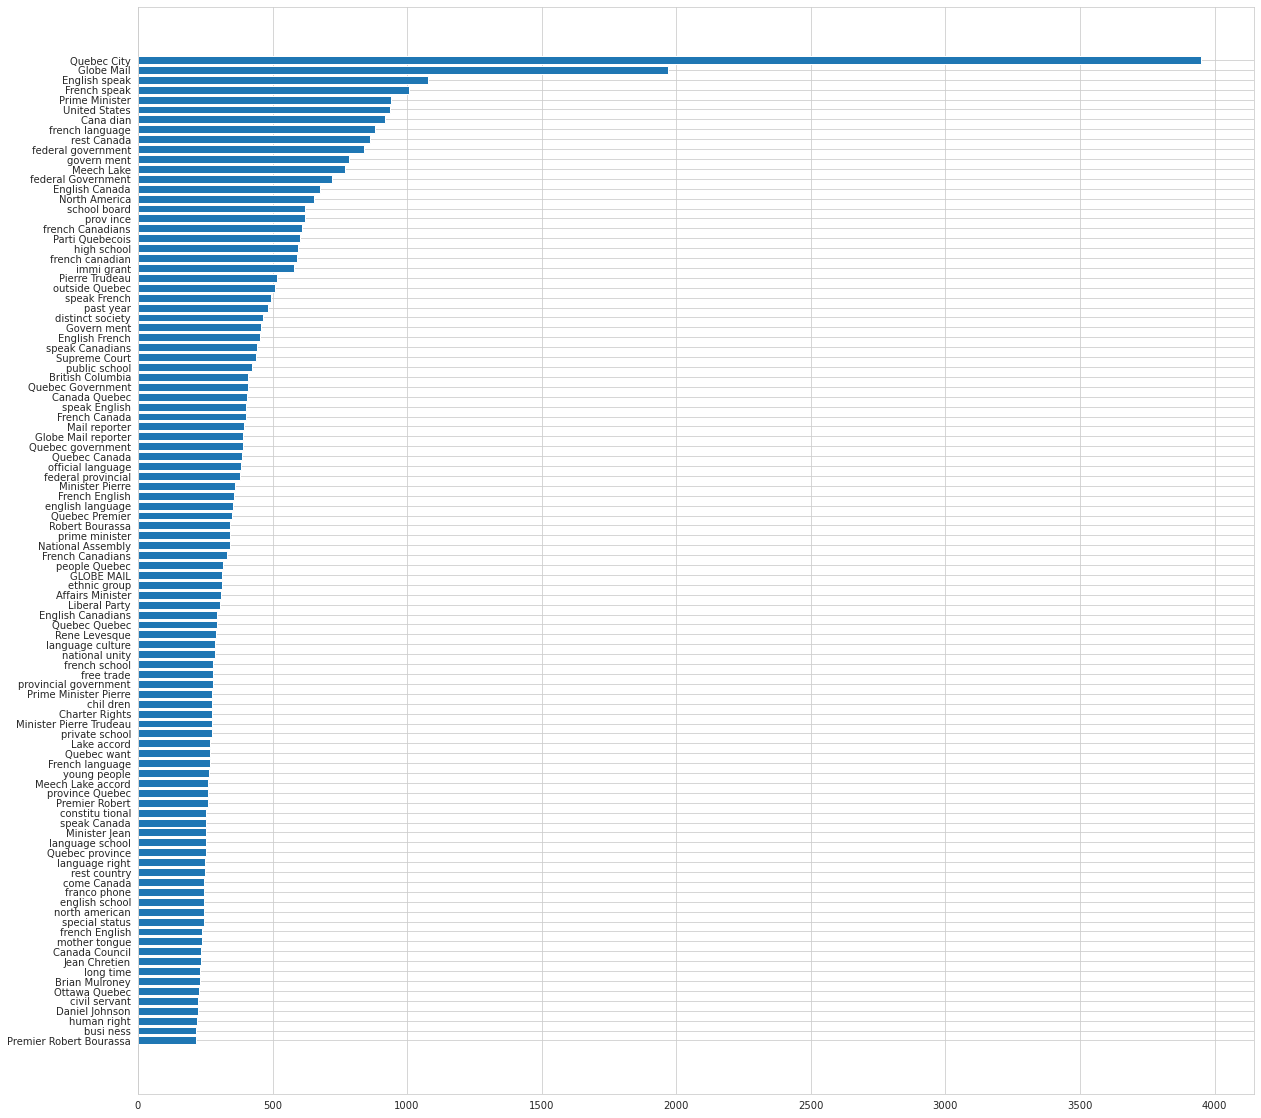

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,20)
sns.set_style('whitegrid')
fig, ax = plt.subplots(1)
mask = np.array([' ' in word for word in tfvectorizer.get_feature_names_out()])
vocab=tfvectorizer.get_feature_names_out()[mask]
words = vocab[np.argsort(frequency_of_words[mask])[::-1]][:100]
freq = frequency_of_words[np.argsort(frequency_of_words)[::-1]][:100]
ax.barh(words[::-1],width=freq[::-1])
# ax.set_xticklabels*

# Topic Modeling

In [16]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from sklearn.feature_extraction import text

def preprocessor(text):
    return ' '.join([token.lemma_ for token in nlp(text) if token.lemma_.isalpha() and len(token.lemma_)>3])

if not os.path.isfile('data/MC_analysis/idfvectorizer.pickle'):

    nlp=spacy.load('en_core_web_sm', disable=['textcat', 'ner', 'parser',])

    idfvectorizer = TfidfVectorizer(preprocessor=preprocessor,
                                 ngram_range=(1,3),
                                 max_features=10000,
                                 use_idf=True,
                                 stop_words=text.ENGLISH_STOP_WORDS.difference({'made'}),
                                )
    idf_X = idfvectorizer.fit_transform(df['full text'])
    pickle.dump(idfvectorizer, open('data/MC_analysis/idfvectorizer.pickle', 'wb'))
else:
    idfvectorizer = pickle.load(open('data/MC_analysis/idfvectorizer.pickle', 'rb'))
    idf_X = idfvectorizer.transform(df['full text'])
    
print(idf_X.shape)
print(np.sum(idf_X))

(17026, 10000)
207483.9858259754


In [17]:
from sklearn.decomposition import LatentDirichletAllocation
n_components=10
lda = LatentDirichletAllocation(n_components=n_components,
                               )
lda.fit(idf_X)

LatentDirichletAllocation()

In [18]:
idf_vocab = idfvectorizer.get_feature_names_out()
for topic in range(lda.components_.shape[0]):
    words_weight = lda.components_[topic,:]
    print(f'topic #{topic}: '+' '.join(idf_vocab[np.argsort(words_weight)[::-1]][:10]))

topic #0: school student board child parent education school board teacher School public school
topic #1: Homolka CANADA quebec title Castonguay Quebec civil Quebec court Quebec Court Claude Morin reject Quebec
topic #2: Quan census datum expire Quebec separation Wilson deteriorate probe state ment employ ment sibility
topic #3: Doug muse coach guarantee right waterfront compassion canvas plaza Quebec Premier Jean fede
topic #4: immigrant immigration cent immi Immigration immi grant Canada grant population refugee
topic #5: Doug muse coach guarantee right waterfront compassion canvas plaza Quebec Premier Jean fede
topic #6: Canada film year Quebec people culture Toronto city work canadian
topic #7: CULTURE Doug muse coach guarantee right waterfront compassion canvas plaza Quebec Premier Jean
topic #8: Quebec Canada government federal province constitutional right Meech Bourassa Trudeau
topic #9: Quebec French french language speak English Government Canada province federal


array([    1, 15033,  1990,     0,     0,     0,     0,     0,     1,
           1])

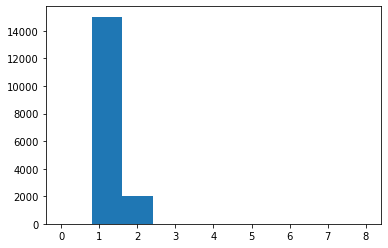

In [20]:
import matplotlib.pyplot as plt
plt.hist(np.argsort(lda.transform(idf_X),axis=1)[::1][:,0], bins=n_components)[0].astype('int')

In [29]:
lda.transform(idf_X)[0,:]

array([0.00876105, 0.00875895, 0.00875917, 0.00875969, 0.00875899,
       0.00875958, 0.92116435, 0.00875895, 0.00876031, 0.00875895])

# t-SNE

In [23]:
from sklearn.manifold import TSNE
plt.rcParams["figure.figsize"] = (15,15)

tsne = TSNE(n_components=2, init='pca', learning_rate='auto' )
X2D = tsne.fit_transform(idf_X.toarray())

# from sklearn.cluster import DBSCAN
# dbscan = DBSCAN(eps=1)
# dbscan.fit(X2D)

/home/ec2-user/SageMaker/.conda/envs/imm/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [87]:
len(set(dbscan.labels_))-1

790

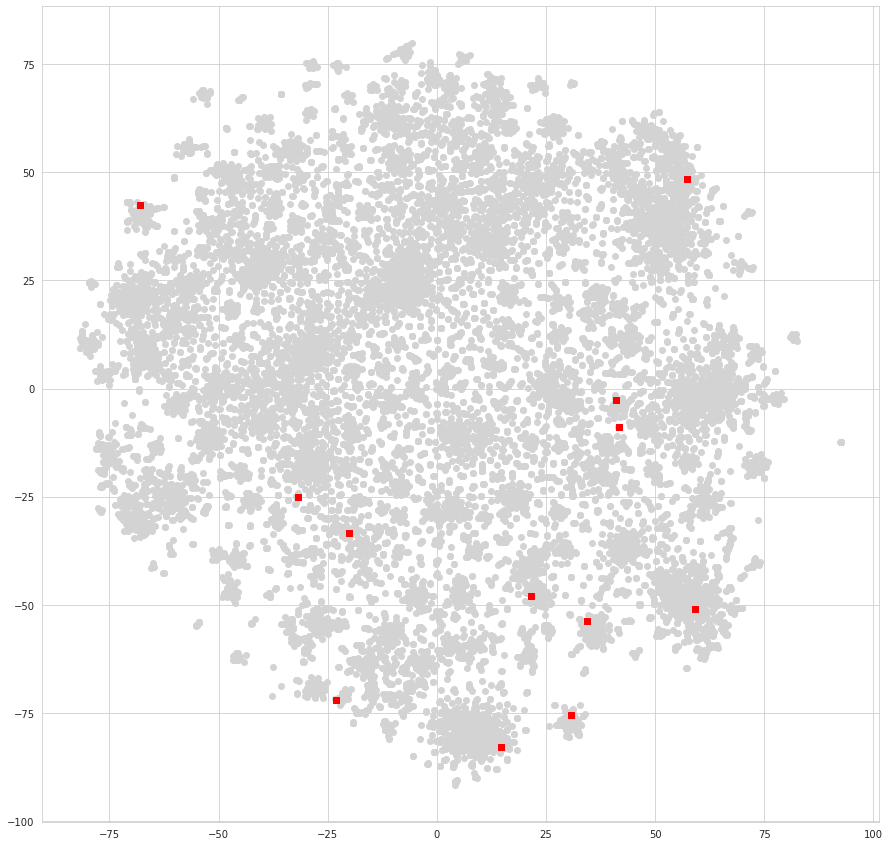

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)

# for cluster_id in range(len(set(dbscan.labels_))-1):
#     ax.scatter(X2D[dbscan.labels_==cluster_id,0],X2D[dbscan.labels_==cluster_id, 1])

# ax.scatter(X2D[dbscan.labels_==-1,0],X2D[dbscan.labels_==-1, 1], c='lightgray')
ax.scatter(X2D[12:,0],X2D[12:,1],  c='b')
ax.scatter(X2D[:12,0],X2D[:12,1], c='r', marker='s')

# Temp freq graph

In [4]:

dates[:2]

['1985-03-04', '1990-03-23']

In [7]:
import numpy as np
np.argsort(dates)

array([  232,   564,  1851, ..., 15022, 12047, 14213])